**Last name:** Vera

**Date:** 01/23/2020

**Approach:** I used a Gradient Boosting Classifier algorithms because we had features with different ranges, more samples than features and more unbalanced classes. I used a grid search cross-validation to find the best hyper-parameter values.

**Estimated AUC:** 0.86

# EDA

In [1]:
### Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

### ML packages
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
### Setting the seed for reproducibility
SEED = 1



In [2]:
### specifying file names
file_train = 'train.csv'
file_test = 'test.csv'

### Reading files
train_df = pd.read_csv(file_train)
test_df = pd.read_csv(file_test)

## Missing values & imputation 

### Train Dataframe

In [3]:
## Looking for missing values in training data
train_df.info(verbose = True)
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
age                           10000 non-null int64
cost_of_ad                    10000 non-null float64
device_type                   10000 non-null object
gender                        9731 non-null object
in_initial_launch_location    10000 non-null int64
income                        10000 non-null int64
n_drivers                     10000 non-null int64
n_vehicles                    10000 non-null int64
prior_ins_tenure              10000 non-null int64
outcome                       10000 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000
mean,37.991800,0.004666,0.497500,58004.335800,1.497000,2.00220,5.406800,0.0982
std,13.038203,0.000838,0.500019,17330.778355,0.500016,0.81784,5.046014,0.2976
min,16.000000,0.003171,0.000000,16241.000000,1.000000,1.00000,0.000000,0.0000
25%,27.000000,0.003995,0.000000,45533.500000,1.000000,1.00000,1.000000,0.0000
50%,38.000000,0.004625,0.000000,58053.500000,1.000000,2.00000,4.000000,0.0000
75%,49.000000,0.005164,1.000000,70235.250000,2.000000,3.00000,8.000000,0.0000
max,60.000000,0.007082,1.000000,99956.000000,2.000000,3.00000,22.000000,1.0000


Only 2.7% of the gender observations are missing. Therefore, **we are not going to impute any missing values for gender in the training data.**

In [4]:
### Dropping missing values
train_dropped = train_df.copy()
train_dropped = train_dropped.dropna()
train_dropped.shape

(9731, 10)

### Test Dataframe

In [ ]:
test_df.info(verbose = True)

**We need to predict for all rows in test.csv**, but we have some gender missing values. 
Even though, we are going to train our model without any imputations.
For the missing value of gender in the test dataset, we are going to impute them using a random choice with  the same distribution that we see on the training and testing data between F and M.

In [5]:
### Obtaining the frequency ratio of Female and Male in order to impute with the same ratio.
ratio_F_train = len(train_df[train_df['gender'] == 'F'])/len(train_df[train_df['gender'] == 'M'])
ratio_F_test = len(test_df[test_df['gender'] == 'F'])/len(test_df[test_df['gender'] == 'M'])

ratio_F = np.mean(np.array([ratio_F_test, ratio_F_train]))

print(ratio_F_train)
print(ratio_F_test)
print(ratio_F)

1.0438983406847302
1.0125902992776057
1.028244319981168


In [6]:
### Impluting missing values for test dataframe using the ratio of train and test

for value in test_df['gender'].iteritems():
    if value == np.nan:
        choice = rand.choices(['F','M'], weights = [ratio_F,1])[0]
        test_df[value, 'gender'].replace(to_replace = np.nan,
                                         value      = choice,
                                         inplace    = True)
    elif value != np.nan:
        continue
    else:
        print("Something went wrong")

### Distributions

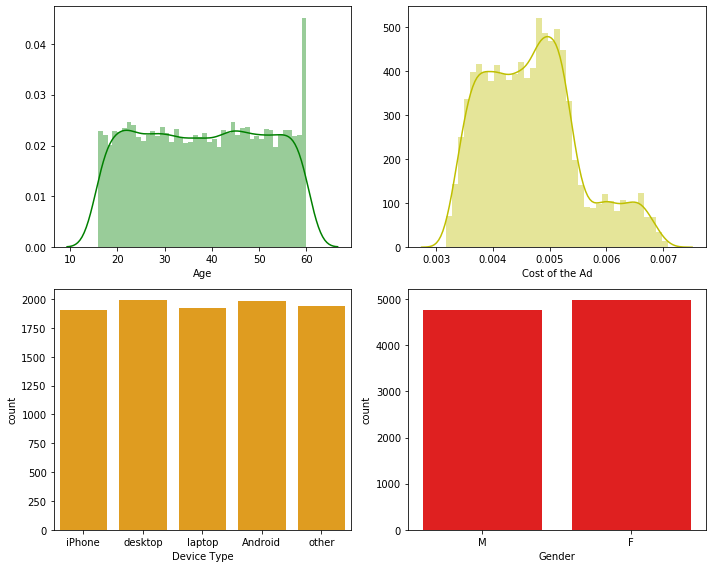

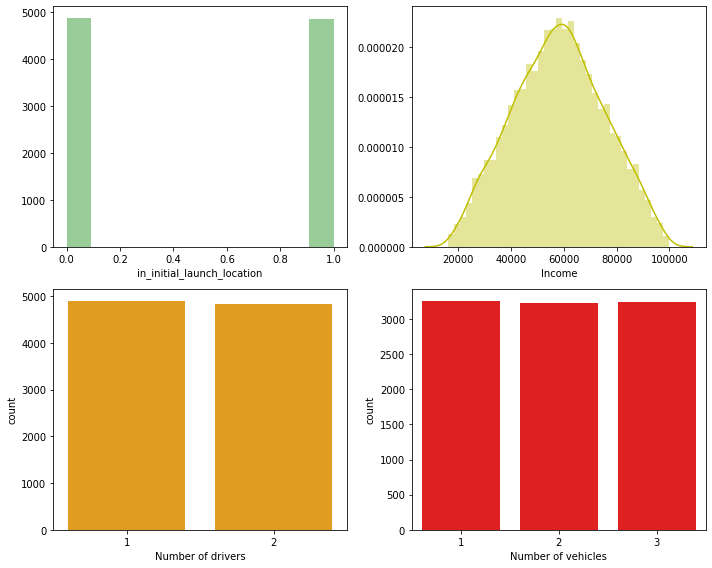

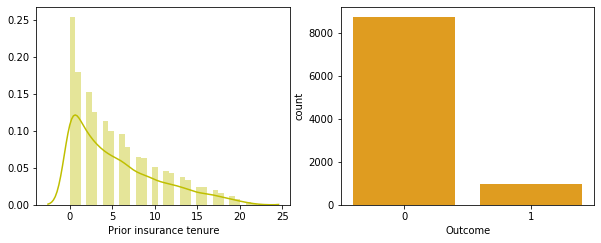

In [7]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(train_dropped['age'],
             bins  = 44, #60 -16 is the range of ages, so 44 bins to have a bin for each age 
             color = 'g')
plt.xlabel('Age')

########################

plt.subplot(2, 2, 2)
sns.distplot(train_dropped['cost_of_ad'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Cost of the Ad')

########################

plt.subplot(2, 2, 3)
sns.countplot(train_dropped['device_type'],
             color = 'orange')
plt.xlabel('Device Type')

########################
plt.subplot(2, 2, 4)
sns.countplot(train_dropped['gender'],
             color = 'r')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(train_dropped['in_initial_launch_location'],
             bins  = 'fd',
             kde   = False,
             color = 'g')
plt.xlabel('in_initial_launch_location')

########################

plt.subplot(2, 2, 2)
sns.distplot(train_dropped['income'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Income')

########################

plt.subplot(2, 2, 3)
sns.countplot(train_dropped['n_drivers'],
             color = 'orange')
plt.xlabel('Number of drivers')

########################

plt.subplot(2, 2, 4)
sns.countplot(train_dropped['n_vehicles'],
             color = 'r')
plt.xlabel('Number of vehicles')
plt.tight_layout()
plt.show()


########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(train_dropped['prior_ins_tenure'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Prior insurance tenure')


########################

plt.subplot(2, 2, 2)
sns.countplot(train_dropped['outcome'],
             color = 'orange')
plt.xlabel('Outcome')
plt.show()

# Feature Engineering

We can see that most of the clients have an age of 60. At the same time, we see a not very uniformal distribution for cost_of_ad. From one side, we can see that costs below 0.0055 behave differently from costs above 0.0055. 

That's why, we are going to Feature engineering for these two features

In [8]:
### Feature engineering for age and Cost of ad
age_hi = 59
cost_of_ad_hi = 0.0055


### TRAIN DATASET
# trend-based feature engineering for age
train_dropped['age_high'] = 0
condition = train_dropped.loc[0 : ,'age_high'][train_dropped['age'] > age_hi]

train_dropped['age_high'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# trend-based feature engineering for cost_of_ad
train_dropped['cost_of_ad_high'] = 0
condition = train_dropped.loc[0 : ,'cost_of_ad_high'][train_dropped['cost_of_ad'] > cost_of_ad_hi]

train_dropped['cost_of_ad_high'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



### TEST DATASET
# trend-based feature engineering for age
test_df['age_high'] = 0
condition = test_df.loc[0 : ,'age_high'][test_df['age'] > age_hi]

test_df['age_high'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# trend-based feature engineering for cost_of_ad
test_df['cost_of_ad_high'] = 0
condition = test_df.loc[0 : ,'cost_of_ad_high'][test_df['cost_of_ad'] > cost_of_ad_hi]

test_df['cost_of_ad_high'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

train_dropped.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome,age_high,cost_of_ad_high
0,56,0.005737,iPhone,M,0,62717,2,1,4,0,0,1
1,50,0.004733,desktop,F,0,64328,2,3,2,0,0,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0,0,0
3,16,0.005117,Android,F,0,30110,2,3,0,0,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0,0,0


# One-hot encoding

In [9]:
#### One-hot Ecoding for gender and device_type
one_hot_gender_train = pd.get_dummies(train_dropped["gender"])
one_hot_device_train = pd.get_dummies(train_dropped["device_type"])

one_hot_gender_test = pd.get_dummies(test_df["gender"])
one_hot_device_test = pd.get_dummies(test_df["device_type"])


### Dropping encoded varibles from the df
train_encoded = train_dropped.copy()
test_encoded  = test_df.copy()

train_encoded = train_encoded.drop(['gender','device_type'], axis = 1)
test_encoded = test_encoded.drop(['gender','device_type'], axis = 1)

### Joining encoders togethers
train_encoded = train_encoded.join([one_hot_gender_train, one_hot_device_train])
test_encoded = test_encoded.join([one_hot_gender_test, one_hot_device_test])

# Classifier Algorithm

In [10]:
### Split the train data into X and y for the algorithms
X = train_encoded.drop('outcome', axis =1)
y = train_encoded['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size    = 0.3, 
                                                    random_state = SEED,
                                                    stratify     = y
                                                   )


## Gradient Boosting Classifier

In [11]:
pipeline = Pipeline(
    [('scale', RobustScaler()),
        ('gbc', GradientBoostingClassifier(random_state = SEED))]
)

params_gbc = {
    'gbc__learning_rate': [0.04, 0.05, 0.06],
    'gbc__n_estimators' : [200, 300, 400],
    'gbc__subsample'    : [0.8]
}

grid_gbc = GridSearchCV(estimator  = pipeline, 
                        param_grid = params_gbc,
                        cv         = 4,
                        verbose    = 1, 
                        n_jobs     = 1
                        )

grid_gbc.fit(X_train, y_train)
best_hyperparams = grid_gbc.best_params_
best_hyperparams

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   55.1s finished


{'gbc__learning_rate': 0.04, 'gbc__n_estimators': 300, 'gbc__subsample': 0.8}

In [ ]:
#Choosing the best model to predict.
best_model = grid_gbc.best_estimator_

train_pred_proba = best_model.predict_proba(X_test)[:,1]

rf_clf_roc_auc_score = roc_auc_score(y_test, train_pred_proba)

print(f"The AUC score of the model is:\n{rf_clf_roc_auc_score.round(3)}")

# Predicting over test.csv

In [ ]:
test_pred = best_model.predict(test_encoded)
test_final_predictions = test_df.copy()
test_final_predictions['Prediction'] = pd.Series(test_pred)

# Last Cell, Final predictions to test.csv

In [ ]:
test_final_predictions.head(5)